# Importing modules and packages 

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map
from sympy import symbols, diff
from math import log
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
%matplotlib inline

# Example 1 - a simple cost function 
$f(x)= x^2 + x+1$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
#make data
x_1=np.linspace(start=-3, stop=3, num=500)

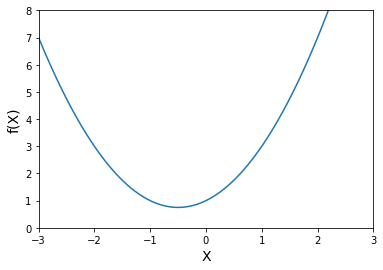

In [4]:
#plot 
plt.plot(x_1, f(x_1))
plt.xlabel('X', fontsize=14)
plt.ylabel('f(X)', fontsize=14)
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.show()

## Derivative of $f(X)$

In [5]:
def df(x):
    return 2*x +1

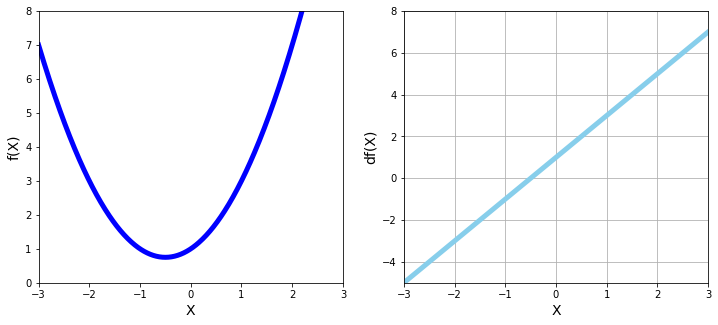

In [6]:
#plot 
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=5)
plt.xlabel('X', fontsize=14)
plt.ylabel('f(X)', fontsize=14)
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.subplot(1, 2, 2)
plt.xlabel('X', fontsize=14)
plt.ylabel('df(X)', fontsize=14)
plt.grid()
plt.xlim([-3, 3])
plt.ylim([-5, 8])
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

# Gradient Descent

In [7]:
new_x=1
step=0.1
x_list=[new_x]
slopes=[df(new_x)]
while abs(df(new_x))>1e-5:
    previous_x=new_x
    grad= df(previous_x)
    new_x=previous_x-step* grad
    x_list.append(new_x)
    slopes.append(df(new_x))
x_list=np.array(x_list)

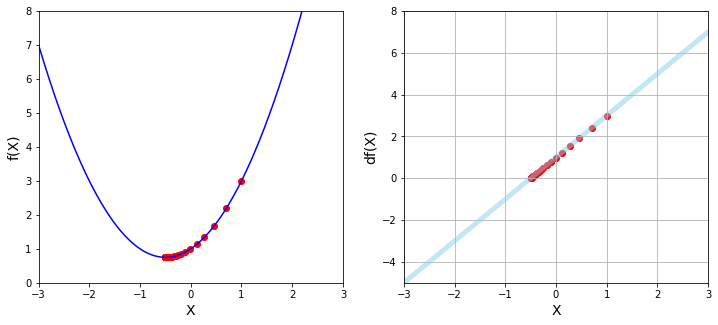

In [8]:
#plot 
plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
plt.scatter(x_list, f(x_list), color='red')
plt.plot(x_1, f(x_1), color='blue')
plt.xlabel('X', fontsize=14)
plt.ylabel('f(X)', fontsize=14)
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.subplot(1, 2, 2)
plt.scatter(x_list, slopes, color='red')
plt.xlabel('X', fontsize=14)
plt.ylabel('df(X)', fontsize=14)
plt.grid()
plt.xlim([-3, 3])
plt.ylim([-5, 8])
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.5)


plt.show()

# Example 2 Multiple minima
## $$g(x)=x^4-4x^2+5$$

In [9]:
#make data
x_2=np.linspace(-2, 2, 1000)

In [10]:
#functions
def g(x):
    return x**4-4*x**2+5
def dg(x):
    return 4*x**3-8*x

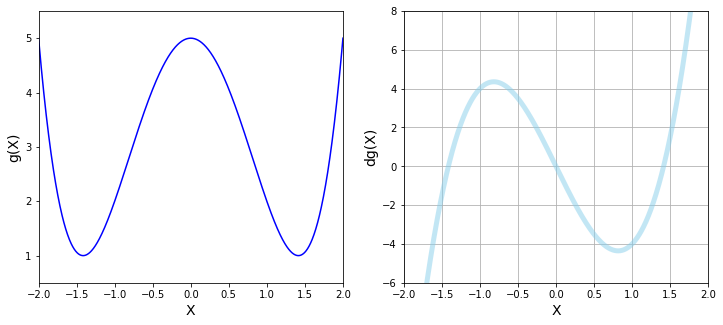

In [11]:
#plot 
plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)

plt.plot(x_2, g(x_2), color='blue')
plt.xlabel('X', fontsize=14)
plt.ylabel('g(X)', fontsize=14)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.subplot(1, 2, 2)

plt.xlabel('X', fontsize=14)
plt.ylabel('dg(X)', fontsize=14)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.5)


plt.show()

## Gradient Descent function

In [12]:
def gradient_descent(der_func, initial_guess, step, tolerance):
    
    new_x=initial_guess
    x_list=[new_x]
    slopes=[der_func(new_x)]
    tot_steps=0
    while abs(der_func(new_x))>tolerance:
        previous_x=new_x
        grad= der_func(previous_x)
        new_x=previous_x-step* grad
        x_list.append(new_x)
        slopes.append(df(new_x))
        tot_steps+=1
    x_list=np.array(x_list)
    print(tot_steps)
    return new_x, x_list, slopes

In [13]:
local_min, x_list, slopes=gradient_descent(dg, 0.5, 0.02, 1e-6)
print(local_min)

49
1.4142135028234895


In [14]:
local_min, x_list, slopes=gradient_descent(dg, -0.5, 0.09, 1e-6)
print(local_min)

19
-1.4142136226991093


In [15]:
import sys
sys.version
sys.float_info.max

1.7976931348623157e+308

# 3D plots
## minimize $$f(x,y)=\frac{1}{3^{-x^2-y^2}+1}$$

In [16]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r+1)

In [17]:
x_3=np.linspace(-2, 2, 200)
y_3=np.linspace(-2, 2, 200)

x_3, y_3=np.meshgrid(x_3, y_3)

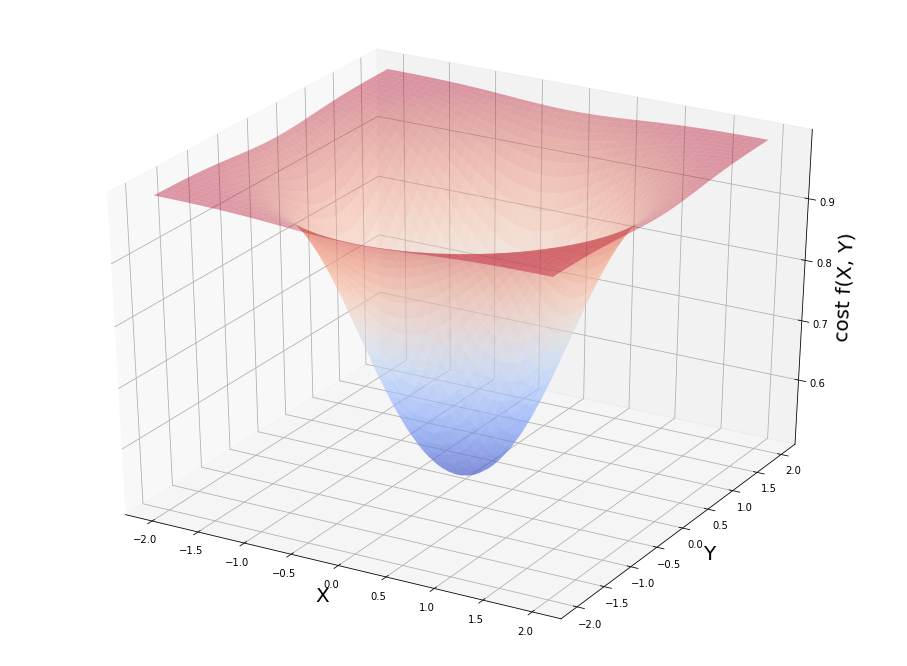

In [18]:
fig= plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('cost f(X, Y)', fontsize=20)
ax.plot_surface(x_3, y_3, f(x_3, y_3), cmap=cm.coolwarm, alpha=0.4)
plt.show()

# Partial Derivatives and SymPy
## $$\frac{\partial f}{\partial x}= \frac{2x \ln(3) \cdot{3^{-x^2-y^2}}}{\left(3^{-x^2-y^2}+1\right)^2}$$
## $$\frac{\partial f}{\partial y}= \frac{2y \ln(3) \cdot{3^{-x^2-y^2}}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [19]:
a, b = symbols('x, y')
print('der wrt x: ', diff(f(a,b), a))
print('der wrt y: ', diff(f(a,b), b))

der wrt x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
der wrt y:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


# Batch gradient descent

In [20]:
max_iter=500
step= 0.1
params=np.array([1.8, 1.0])
for n in range(max_iter):
    gradient_x= diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y= diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients= np.array([gradient_x, gradient_y])
    params=params- step*gradients
print('minima is at', params)
print('value of cost func at minima', f(params[0], params[1]))

minima is at [3.45838599885832e-11 1.92132555492129e-11]
value of cost func at minima 0.500000000000000


In [21]:
#partial dervatives
def fpx(x, y):
    r=3**(-x**2-y**2)
    return 2*x*log(3)*r/(r+1)**2

def fpy(x, y):
    r=3**(-x**2-y**2)
    return 2*y*log(3)*r/(r+1)**2

In [22]:
max_iter=500
step= 0.1
params=np.array([1.8, 1.0])
for n in range(max_iter):
    gradient_x= fpx(params[0], params[1])
    gradient_y= fpy(params[0], params[1])
    gradients= np.array([gradient_x, gradient_y])
    params=params- step*gradients
print('minima is at', params)
print('value of cost func at minima', f(params[0], params[1]))

minima is at [3.45838600e-11 1.92132555e-11]
value of cost func at minima 0.5


In [23]:
gradients

array([2.01013038e-11, 1.11673910e-11])

# Graphing 3D gradient descent

In [24]:
max_iter=500
step= 0.1
params=np.array([1.8, 1.0])
values_array= params.reshape(1,2)

for n in range(max_iter):
    gradient_x= fpx(params[0], params[1])
    gradient_y= fpy(params[0], params[1])
    gradients= np.array([gradient_x, gradient_y])
    params=params- step*gradients
    values_array=np.append(arr=values_array, values=params.reshape(1,2), axis=0)
print('minima is at', params)
print('value of cost func at minima', f(params[0], params[1]))

minima is at [3.45838600e-11 1.92132555e-11]
value of cost func at minima 0.5


In [25]:
#numpy ndarray
stars=np.array([['sun','bright']])
planets=np.array([['mercury','venus'],['earth','mars']])
plans=np.append(arr=planets, values=stars, axis=0)
print(plans)
print(planets.shape, stars.shape)
print(plans[:,0].shape)

[['mercury' 'venus']
 ['earth' 'mars']
 ['sun' 'bright']]
(2, 2) (1, 2)
(3,)


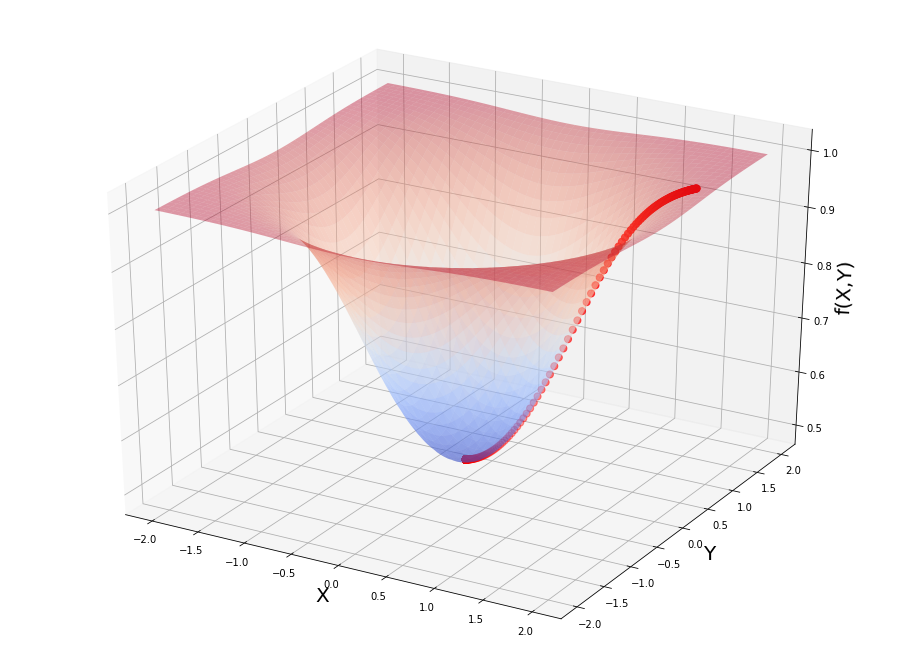

In [26]:
#3d plot gradient descent
fig=plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X,Y)', fontsize=20)

ax.plot_surface(x_3, y_3, f(x_3, y_3), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1])
          ,color='red', s=50)
plt.show()

# Mean squared error
### $$RSS = \sum_{i=1}^n \big(y^{(i)}-h_{\theta}{(x)^{(i)}} \big)^2 $$
###  $$MSE = \frac{1}{n}\sum_{i=1}^n \big(y^{(i)}-h_{\theta}{(x)^{(i)}} \big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^n \big(y - \hat{y} \big)^2 $$

In [30]:
#making data
x_5= np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5= np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)
print('shape of x_5: ', x_5.shape)
print('shape of y_5: ', y_5.shape)

shape of x_5:  (7, 1)
shape of y_5:  (7, 1)


In [33]:
regr=LinearRegression()
regr.fit(x_5, y_5)
print('theta0: ', regr.intercept_[0] )
print('theta1: ', regr.coef_[0][0])

theta0:  0.8475351486029536
theta1:  1.2227264637835915


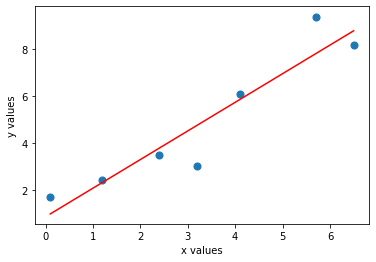

In [34]:
#plot
plt.scatter(x_5, y_5,s=50)
plt.plot(x_5, regr.predict(x_5),color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [36]:
#y_hat= theta0 + theta1*x
y_hat= 0.8475351486029536 + 1.2227264637835915 * x_5
print('estimated y values:\n', y_hat)
print('actual y values:\n', y_5)

estimated y values:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
actual y values:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [45]:
#mean square error
def mse(y, y_hat):
    sum_=(y-y_hat)**2
    return sum(sum_)/len(y)
print('manually calculated mse: ',mse(y_5, y_hat))

manually calculated mse:  [0.94796558]


In [47]:
print('manually calculated mse: ',mean_squared_error(y_5, y_hat))
print('mse regression is :', mean_squared_error(y_5, regr.predict(x_5)))

manually calculated mse:  0.9479655759794577
mse regression is : 0.9479655759794577


In [63]:
#make data for thetas
nr_thetas=200
th_0= np.linspace(-1, 3, nr_thetas)
th_1= np.linspace(-1, 3, nr_thetas)
plot_t0, plot_t1= np.meshgrid(th_0, th_1)

In [65]:
plot_cost=np.zeros((nr_thetas, nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat=plot_t0[i][j] + plot_t1[i][j]* x_5
        plot_cost[i][j]=mse(y_5, y_hat)

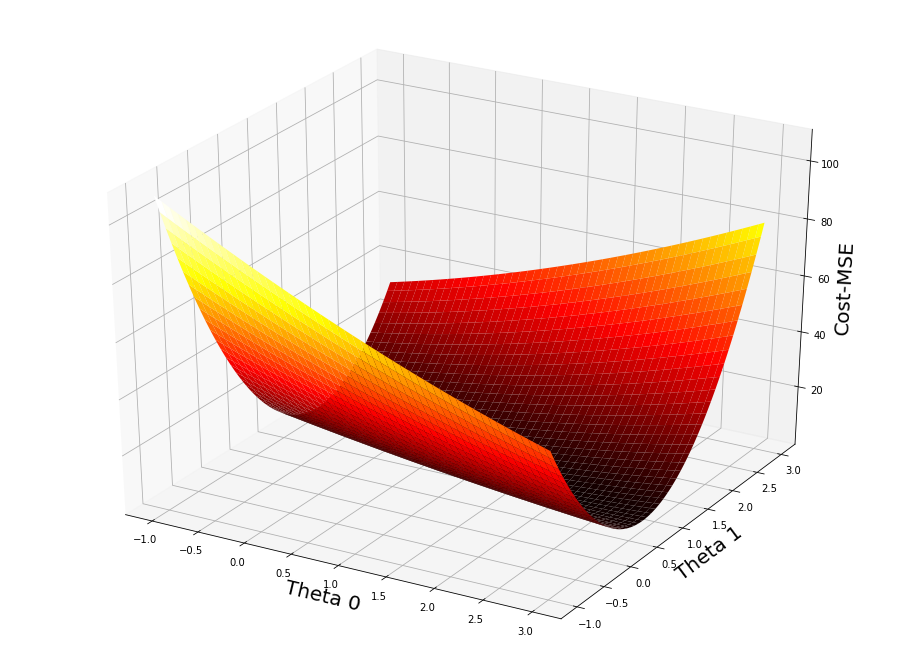

In [67]:
#plot mse
fig= plt.figure(figsize=(16,12))
ax= plt.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost-MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [72]:
print('min value of plot_cost: ', plot_cost.min())
ij_min= np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('i, j values are: ', ij_min)
print('theta 0 value at minima: ', plot_t0[111][91])
print('theta 1 value at minima: ', plot_t1[111][91])

min value of plot_cost:  0.9483826526747164
i, j values are:  (111, 91)
theta 0 value at minima:  0.829145728643216
theta 1 value at minima:  1.2311557788944723


## Partial der of mse wrt $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0}= -\frac{2}{n}\sum_{i=1}^{n} \big(y^{(i)}-\theta_0-\theta_1 x^{(i)} \big) $$
## $$\frac{\partial MSE}{\partial \theta_1}= -\frac{2}{n}\sum_{i=1}^{n} \big(y^{(i)}-\theta_0-\theta_1 x^{(i)} \big)\big(x^{(i)}\big) $$

In [83]:
def gradient(x, y, thetas):
    n=y.size
    slope_theta0= (-2/n)* sum(y-thetas[0]-thetas[1]*x)
    slope_thetas1=(-2/n)* sum((y-thetas[0]-thetas[1]*x)*x)
    
    return np.concatenate((slope_theta0, slope_thetas1), axis=0)

In [98]:
thetas=np.array([2.9,2.9])
step=0.01

#data points to plot descent
theta_vals= thetas.reshape(1,2)
mse_vals= mse(y_5, thetas[0]+thetas[1]*x_5)

for i in range(1000):
    thetas=thetas-step*gradient(x_5, y_5, thetas) 
    #append theta values to theta vals
    theta_vals= np.concatenate((theta_vals, thetas.reshape(1,2)), axis=0)
    mse_vals= np.append(arr=mse_vals, values=mse(y_5, thetas[0]+thetas[1]*x_5))
    
    
print('theta0, theta1 for minima', thetas[0], thetas[1])
print('mse is: ', mse(y_5, thetas[0]+thetas[1]*x_5))

theta0, theta1 for minima 0.8532230461743415 1.2214935332607393
mse is:  [0.94797511]


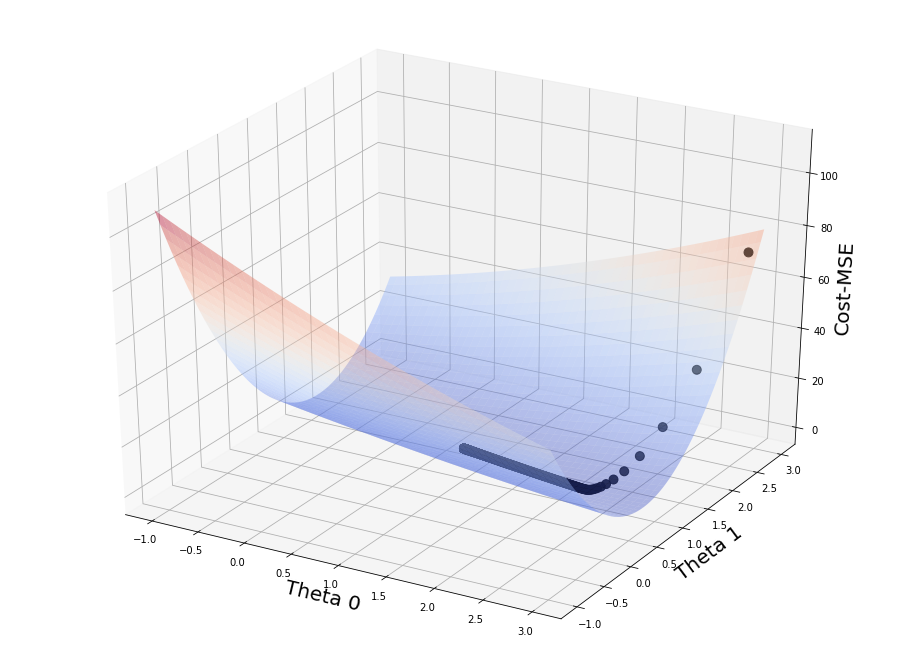

In [101]:
#plot descent
fig= plt.figure(figsize=(16,12))
ax= plt.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost-MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm, alpha=0.4)

ax.scatter(theta_vals[:, 0], theta_vals[:, 1], mse_vals, s=80, color='black')
plt.show()